In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_yaml, load_model
from keras.preprocessing import image

/Users/ravi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Intializing the CNN ##
classifier = Sequential()

In [3]:
## Convolution Layer 1  ##
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
## Pooling Step 1 using Max Pooling ##
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
## Convolution Layer 2  ##
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [6]:
## Pooling Step 2 using Max Pooling ##
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
## Flatteinng the Feature Maps to Single dimensional vector ##
classifier.add(Flatten())

In [8]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
## −(ylog(p)+(1−y)log(1−p)) => binary cross entropy formula ##
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('./dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('./dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.


In [15]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 224,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 10)

Epoch 1/5
224/224 [==============================] - 44s 195ms/step - loss: 0.1688 - acc: 0.9235 - val_loss: 1.2418e-04 - val_acc: 1.0000
Epoch 2/5
224/224 [==============================] - 42s 189ms/step - loss: 0.0123 - acc: 0.9973 - val_loss: 3.4633e-05 - val_acc: 1.0000
Epoch 3/5
224/224 [==============================] - 42s 187ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 3.0057e-05 - val_acc: 1.0000
Epoch 4/5
224/224 [==============================] - 42s 188ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 5.8742e-06 - val_acc: 1.0000
Epoch 5/5
224/224 [==============================] - 49s 220ms/step - loss: 6.1234e-04 - acc: 1.0000 - val_loss: 3.6903e-06 - val_acc: 1.0000


#### Saving the model

In [16]:
model_yaml = classifier.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
def load_model_from_file():
    # load YAML and create model
    yaml_file = open('model.yaml', 'r')
    loaded_model_yaml = yaml_file.read()
    yaml_file.close()
    loaded_model = model_from_yaml(loaded_model_yaml)
    
    # load weights into new model
    loaded_model.load_weights("model.h5")
    
    # evaluate loaded model on test data
    loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return loaded_model

#### Preview of the test image

In [24]:
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

def open_and_preview_image(path):
    pil_im = Image.open(path, 'r')
    imshow(np.asarray(pil_im))

In [23]:
def predict_image(path):
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    classifier = load_model_from_file()
    result = classifier.predict(test_image)
    if result[0][0] == 0:
       prediction = 'Image contains Apple Logo'
    else:
       prediction = 'Image does not contain Apple Logo'
    print(prediction)

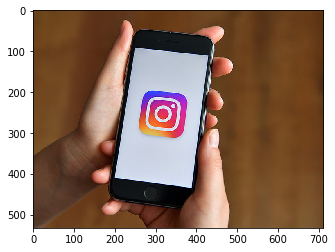

In [25]:
open_and_preview_image('./dataset/4.jpg')

In [26]:
predict_image('./dataset/4.jpg')

Image does not contain Apple Logo


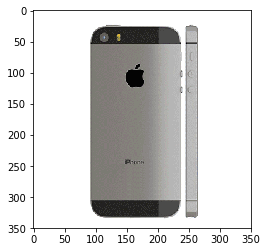

In [27]:
open_and_preview_image('./dataset/3.jpg')

In [28]:
predict_image('./dataset/3.jpg')

Image contains Apple Logo
